# Lab 23 - Confidence intervals for regression

We will use newborn data set from Lab 16, [babies.data](https://www.stat.berkeley.edu/~statlabs/data/babies.data).  This data is from a sample of newborns born between 1960 and 1967 in California in a major hospital system.

The columns are:<br>
bwt: Birth weight in ounces (999 unknown)<br>
gestation: Length of pregnancy in days (999 unknown)<br>
parity: 0= first born, 9=unknown<br>
age: mother's age in years (99 unknown)<br>
height: mother's height in inches (99 unknown)<br>
weight: Mother's prepregnancy weight in pounds (999 unknown)<br>
smoke: Smoking status of mother: 0=not now, 1=yes now, 9=unknown

We will look at the relationship between birth weight and number of gestational days, and the relationship between maternal age and birth weight.

First, let's import the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

### Loading and cleaning the data

Read the CSV file into the dataframe `babies`.  As in Lab 16, we need to add the parameter `sep = "\s+"` since the columns are separated by whitespaces instead of commas.

In [7]:
babies = pd.read_csv("../Data/babies.data",sep = "\s+")

Display your `babies` dataframe below to check it was created properly.

In [8]:
babies.head()

,bwt,gestation,parity,age,height,weight,smoke
0,120,284,0,27,62,100,0
1,113,282,0,33,64,135,0
2,128,279,0,28,64,115,1
3,123,999,0,36,69,190,0
4,108,282,0,23,67,125,1


Plot a histogram of the `gestation` column.

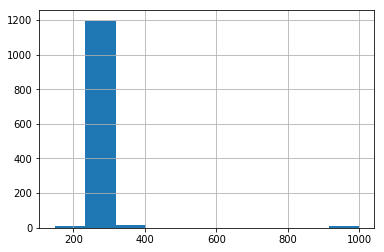

In [9]:
babies["gestation"].hist()

What do you notice about the histogram?  What's the explanation?  (Hint: Read the description of the gestation column above.)

If the number of gestational days is missing, 999 is used instead.  We need to read in the dataset again, this time telling `read_csv()` that 999 represents an NaN value.  Can you figure out how to do this?  See Labs 18 and 22 where we specified a different NaN value for the Starbucks data.

In [11]:
babies = pd.read_csv("../Data/babies.data",sep = "\s+",  na_values = "999")

<details> <summary>Hint:</summary>
Add the parameter <code>na_values = "999"</code>
</details>


Drop any row with an NaN value (also done in Lab 18 and 22):

In [12]:
babies = babies.dropna(axis = 0)

<details> <summary>Pattern:</summary>
<code>df = df.dropna(axis = 0)</code>
</details>

Let's check the unknown values have been successfully dropped by plotting a histogram of the weight or gestation column again.

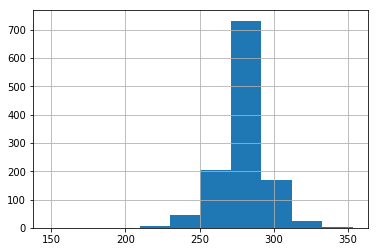

In [13]:
babies["gestation"].hist()

### Relationship between birth weight and gestational days.

In Lab 16 we looked at the relationship between birth weight and the number of gestational days (how long the baby was in the womb).  We will look at this relationship again using regression.

First, we'll visualize the data.  Use the Seaborn library (Lab 21) to plot a scatter plot with the regression line, where gestational days are on the x axis and birth weight (`bwt`) is on the y axis.

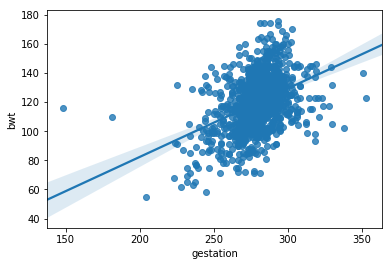

In [14]:
sns.regplot(x = "gestation", y = "bwt", data = babies)

<details> <summary>Pattern:</summary>
<code>sns.regplot(x = "x_axis_column_name", y = "y_axis_column_name", data = df)</code>
</details>

Looking at the graph, do you think there is a linear relationship between the number of gestation days and the birth weight?

There appears to be a weak linear relationship between the gestation days and birth weight.  Let's compute the correlation matrix to get the correlation between the two variables:

In [15]:
babies.corr()

,bwt,gestation,parity,age,height,weight,smoke
bwt,1.000000,0.408403,-0.047546,0.027666,0.182727,0.154234,-0.096390
gestation,0.408403,1.000000,0.079967,-0.052215,0.047798,0.022366,-0.016060
parity,-0.047546,0.079967,1.000000,-0.336763,0.040033,-0.097425,-0.053079
age,0.027666,-0.052215,-0.336763,1.000000,-0.005642,0.143270,0.008675
height,0.182727,0.047798,0.040033,-0.005642,1.000000,0.355296,0.019958
weight,0.154234,0.022366,-0.097425,0.143270,0.355296,1.000000,0.008555
smoke,-0.096390,-0.016060,-0.053079,0.008675,0.019958,0.008555,1.000000


<details> <summary>Pattern:</summary>
<code>df.corr()</code>
</details>

What's the correlation between gestational days and birth weight?  Is it high, low, or in the middle?

Next let's calculate this slope by computing the linear model, and then displaying the model summary:

In [16]:
lm = smf.ols(formula = "bwt ~ gestation", data = babies).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    bwt   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     237.4
Date:                Thu, 18 Apr 2019   Prob (F-statistic):           5.73e-49
Time:                        15:13:42   Log-Likelihood:                -5034.3
No. Observations:                1188   AIC:                         1.007e+04
Df Residuals:                    1186   BIC:                         1.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.6482      8.529     -1.366      0.172     -28.381       5.085
gestation      0.4701      0.031     15.408      0.000       0.410       0.530
==============================================================================
Omnibus:                        3.914   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                3.813
Skew:                           0.116   Prob(JB):                        0.149
Kurtosis:                       3.154   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<details> <summary>Pattern:</summary>
<code>linear_model_variable = smf.ols(formula = "dependent_var ~ independent_var", data = df).fit()
linear_model_variable.summary()</code>
</details>

What's the slope of the regression line?

Remember that this relationship is only based on a sample of data.  A different sample would give a different regression line and slope.  To understand how much the slope could change depending on the sample, we will compute the 95% confidence interval for the slope.  

First, we will create a function for computing the regression and extracting the slope from it:

In [17]:
# df is the name of the dataframe
# x is the name of the column for the independent variable
# y is the name of the column for the dependent variable
def slope(df, x, y):
    formula_string = y + " ~ " + x    # create a string containing the formula in advance
    lm = smf.ols(formula = formula_string, data = df).fit()
    return lm.params[1]

Let's try calling (running) this function on our data:

In [18]:
slope(babies,"gestation","bwt")

0.47005618555942874

Was the slope the same as your previous computation?

To find the 95% confidence interval, we will:
- create an empty list to store the slopes
- take 1000 bootstrap samples the same size as the original data
- for each sample, compute the slope of the regression line using our function and save it in our list

The pseudo-code is:
<code>
slopes = []
loop 1000 times:
    take a bootstrap sample (take a sample with replacement the same size as the original data)
    compute the slope of the regression line of the sample
    add the sample to `slopes`
</code>

Try writing the actual code below:

In [19]:
slopes = []
for i in range(1000):
    sample = babies.sample(1188,replace = True)
    sample_slope = slope(sample,"gestation","bwt")
    slopes.append(sample_slope)

<details><summary>Answer:</summary>
<code>slopes = []
for i in range(1000):
    sample = babies.sample(1188,replace = True)
    sample_slope = slope(sample,"gestation","bwt")
    slopes.append(sample_slope)</code>
</details>

Plot the histogram of the slopes of the samples:

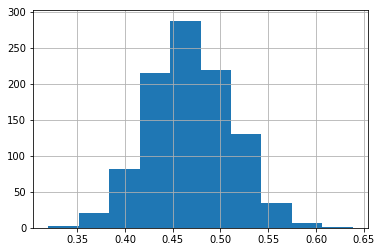

In [20]:
pd.Series(slopes).hist()

What is the mean of the slopes?  How does this compare to the slope of the actual data?

Were any of the sample slopes 0? Does this suggest a different sample of the data could have slope 0?

Finally, let's compute the 95% confidence interval by computing the 0.025 quantile (2.5 percentile) and 0.975 quantile (97.5 percentile).  We can compute the 0.025 quantile with the code `pd.Series(slopes).quantile(0.025)`

In [21]:
pd.Series(slopes).quantile(0.025)

0.3861745509844029

In [22]:
pd.Series(slopes).quantile(0.975)

0.5564799101568054

What's your 95% confidence interval?

It should be close to (0.39,0.56).

### Maternal Age and Birth Weight

Let's look at whether there is a relationship between maternal age and birth weight.  That is, can maternal age in any way predict the birth weight?

Plot a histogram of the maternal ages:

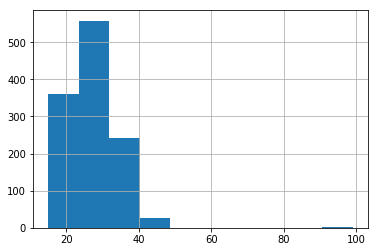

In [23]:
babies["age"].hist()

What do you notice about the histogram?  Why do you think this is the case?  (Hint: look at the descriptions of the columns at the top of the lab)

No, there wasn't a medical miracle of a 99 year old mother giving birth!  99 is used in the maternal age column to indicate the age is unknown.  We should remove the row with the missing age from our dataset.  However, we can't add 99 to the list of missing values, because a birth weight could be 99oz (= 6.2 lbs).  Therefore, we need to use the following code, which tells Pandas that there is a different missing values for each column.

In [24]:
babies = pd.read_csv("../Data/babies.data",sep = "\s+",  na_values = {"gestation":"999","age":"99"})
babies = babies.dropna(axis = 0)

Try plotting a histogram of the maternal ages again.  Did we remove the outlier?

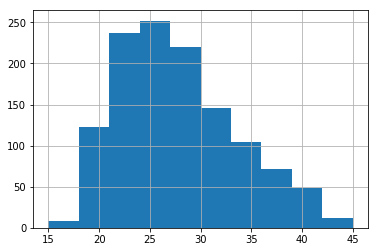

In [25]:
babies["age"].hist()

First plot a scatter plot and regression line of maternal age (x) vs. birth weight (y).

Does the slope look close to 0?  If the slope is 0 it would indicate no relationship.  However, for any particular sample of data, the slope is unlikely to be exactly 0.  Therefore, we want to construct the 95% confidence interval for the slope and check if it contains 0.

We will now compute the 95% confidence interval.  

First, compute 1000 bootstrap samples, saving the slope of the regression line of each sample.

Plot a histogram of the slopes:

Does it look like the 95% confidence interval for the slope will contain 0?

Let's formally calculate the 95% confidence interval for the slope by computing the 0.025 and 0.975 quantiles:

What's the 95% confidence interval for the slope?  Does it contain 0?

If so, we must conclude that there is not enough evidence to show a relationship between maternal age and birth weight.

### Challenges:
- Is there a relationship between maternal height and birth weight?  That is, can birth weight in any way be predicted from maternal height?